## Business Problem:
The city of Seattle is looking to improve low property value neighborhoods. They are looking to upgrade infrastructure and give grants to homeowners in neighborhoods with low-grade houses to improve the property value of the neighborhood. They want to know which neighborhoods would benefit the most from infrastructure upgrades and grants. They want to know what should the homeowners use their grants for to improve the property value the most, and how can they improve infrastructure to increase the property value of the neighborhood?

I will be doing some EDA on the following features of this dataset:

- grade
- date - Date house was sold
- yr_built - Year when house was built
- yr_renovated - Year when house was renovated
- floors - Number of floors (levels) in house

and comparing them to the 'price' column

In [109]:
# Import related libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [110]:
# obtain data from csv
kc = pd.read_csv('../../Data/kc_house_data.csv')

In [111]:
#Visually confirm expected results
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [112]:
# For now, I'll take only what I'm responsible for, and our target, 'Price'
kc_m = kc[['id', 'price', 'grade', 'date', 'yr_built', 'yr_renovated', 'floors']]

In [113]:
#Visually confirm expected results
kc_m.head()

,id,price,grade,date,yr_built,yr_renovated,floors
0,7129300520,221900.0,7 Average,10/13/2014,1955,0.0,1.0
1,6414100192,538000.0,7 Average,12/9/2014,1951,1991.0,2.0
2,5631500400,180000.0,6 Low Average,2/25/2015,1933,NaN,1.0
3,2487200875,604000.0,7 Average,12/9/2014,1965,0.0,1.0
4,1954400510,510000.0,8 Good,2/18/2015,1987,0.0,1.0


In [114]:
kc_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21597 non-null  int64  
 1   price         21597 non-null  float64
 2   grade         21597 non-null  object 
 3   date          21597 non-null  object 
 4   yr_built      21597 non-null  int64  
 5   yr_renovated  17755 non-null  float64
 6   floors        21597 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.2+ MB


## Year Renovated

In [115]:
# It looks like we have some null values in "year renovated".

# 3482 null values
kc_m['yr_renovated'].isna().value_counts()

False    17755
True      3842
Name: yr_renovated, dtype: int64

In [116]:
# Let's also check for any placeholder values too
kc_m['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1948.0        1
1951.0        1
1971.0        1
1934.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

So of the 17755 values that arent null 17011 of them are a 0. Meaning they've never been renovated. I think in this case, it would be better to KEEP all the NA values, and change all those 0's into null values. This way they won't be included in any calculations.

In [117]:
kc_m['yr_renovated'].replace(to_replace=0.0, value = np.nan, inplace=True)

/Users/matthewturner/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [118]:
# Confirm expected results
kc_m['yr_renovated'].value_counts()

2014.0    73
2013.0    31
2003.0    31
2007.0    30
2005.0    29
          ..
1951.0     1
1944.0     1
1976.0     1
1934.0     1
1946.0     1
Name: yr_renovated, Length: 69, dtype: int64

In [119]:
# This result looks much better
kc_m['yr_renovated'].describe()

count     744.000000
mean     1995.928763
std        15.599946
min      1934.000000
25%      1987.000000
50%      2000.000000
75%      2007.250000
max      2015.000000
Name: yr_renovated, dtype: float64

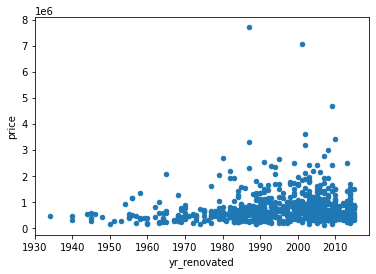

In [120]:
kc_m.plot(kind='scatter', x='yr_renovated', y='price');

Doesn't look like there is a correlation here, but it may be interesting to investigate if a house has ANY renovation makes a differance.

## Grade

In [121]:
# Lets take a look at Grade, something that will be important for my group moving forward.
kc_m['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [122]:
# This is, undoubtedly, a categorical variable. This will need to be changed for our modeling later.
kc_m = pd.get_dummies(data=kc_m, columns=['grade'])

In [123]:
# Ensure grade has been transformed.
kc_m

,id,price,date,yr_built,yr_renovated,floors,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,221900.0,10/13/2014,1955,NaN,1.0,0,0,0,0,0,0,0,0,1,0,0
1,6414100192,538000.0,12/9/2014,1951,1991.0,2.0,0,0,0,0,0,0,0,0,1,0,0
2,5631500400,180000.0,2/25/2015,1933,NaN,1.0,0,0,0,0,0,0,0,1,0,0,0
3,2487200875,604000.0,12/9/2014,1965,NaN,1.0,0,0,0,0,0,0,0,0,1,0,0
4,1954400510,510000.0,2/18/2015,1987,NaN,1.0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,5/21/2014,2009,NaN,3.0,0,0,0,0,0,0,0,0,0,1,0
21593,6600060120,400000.0,2/23/2015,2014,NaN,2.0,0,0,0,0,0,0,0,0,0,1,0
21594,1523300141,402101.0,6/23/2014,2009,NaN,2.0,0,0,0,0,0,0,0,0,1,0,0
21595,291310100,400000.0,1/16/2015,2004,NaN,2.0,0,0,0,0,0,0,0,0,0,1,0


## Floors

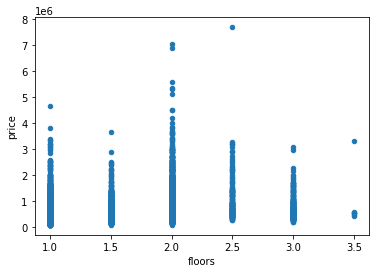

In [124]:
# Lets make sure that Year built and "Floors" aren't categorical either
kc_m.plot(kind='scatter', x='floors', y='price');

In [125]:
# More categorical variables
kc_m['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [126]:
# We only have 6 distinct categories, so lets encode them
kc_m = pd.get_dummies(data=kc_m, columns=['floors'])

In [127]:
# Visually confirm expected results.
kc_m

,id,price,date,yr_built,yr_renovated,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,...,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,7129300520,221900.0,10/13/2014,1955,NaN,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,6414100192,538000.0,12/9/2014,1951,1991.0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,5631500400,180000.0,2/25/2015,1933,NaN,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,2487200875,604000.0,12/9/2014,1965,NaN,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,1954400510,510000.0,2/18/2015,1987,NaN,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,5/21/2014,2009,NaN,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
21593,6600060120,400000.0,2/23/2015,2014,NaN,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
21594,1523300141,402101.0,6/23/2014,2009,NaN,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
21595,291310100,400000.0,1/16/2015,2004,NaN,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


# Date

In [131]:
# Changing Date to datetime object
kc_m['date'] = pd.to_datetime(kc_m['date'])

In [132]:
# Visually confirming change to datetime object
kc_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   21597 non-null  int64         
 1   price                21597 non-null  float64       
 2   date                 21597 non-null  datetime64[ns]
 3   yr_built             21597 non-null  int64         
 4   yr_renovated         744 non-null    float64       
 5   grade_10 Very Good   21597 non-null  uint8         
 6   grade_11 Excellent   21597 non-null  uint8         
 7   grade_12 Luxury      21597 non-null  uint8         
 8   grade_13 Mansion     21597 non-null  uint8         
 9   grade_3 Poor         21597 non-null  uint8         
 10  grade_4 Low          21597 non-null  uint8         
 11  grade_5 Fair         21597 non-null  uint8         
 12  grade_6 Low Average  21597 non-null  uint8         
 13  grade_7 Average      21597 non-

In [133]:
# Checking for any placeholder values in the data
kc_m['date'].value_counts()

2014-06-23    142
2014-06-26    131
2014-06-25    131
2014-07-08    127
2015-04-27    126
             ... 
2014-05-17      1
2014-07-27      1
2014-08-03      1
2014-11-02      1
2015-05-24      1
Name: date, Length: 372, dtype: int64

No placeholders here. Looks okay to move on.